In [25]:
# Detect Area of Floor in Image using OpenCV Contours
# Writes Data to given directory for transmission over FTP

In [26]:
# import the necessary packages
import numpy as np
import imutils
import cv2
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150 # set plot resolution

In [27]:
# Variables

#imPath = "E:\\Summer 2019\\Capstone\\areaTest.jpg"
#imPath = "E:\\Summer 2019\\Capstone\\shapes.png"
imPath = "I:\Summer 2019\Capstone\Frames-DemoTest\_stitched.jpg"
imPath = imPath.replace("\\","\\\\")

height = 2 #height in m off the ground

sampleSize = 6 # larger val = smaller slice
# sShiftx = -800
# sShifty = -350
sShiftx = 0
sShifty = 0
#Values to add to RGB thresholds to to bright spots 
brightShiftR = 10
brightShiftG = 30
brightShiftB = 50

In [28]:
# load the image
image = cv2.imread(imPath)

# find all the 'black' shapes in the image
lower = np.array([0, 0, 0])
upper = np.array([10, 10, 10])
shapeMask = cv2.inRange(image, lower, upper)

887 1241 2128 1880
Floor sample:


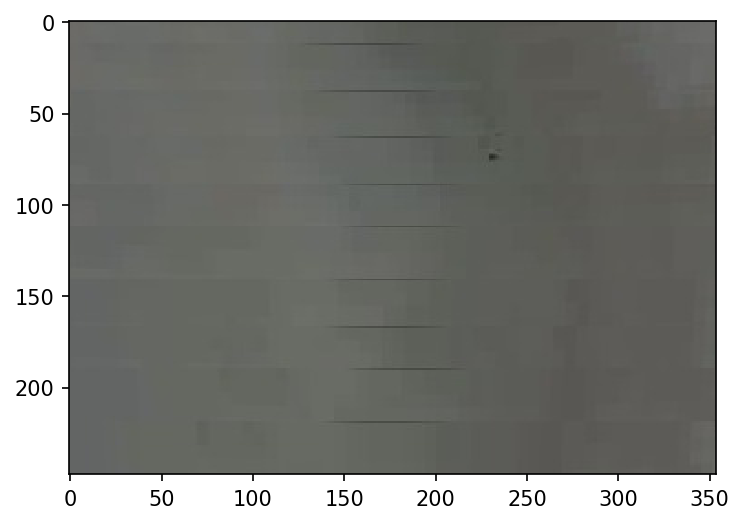

Maximum R: 121 G: 143 B: 161
Minimum R: 33 G: 40 B: 37


In [29]:
imx = image.shape[1]//2 #center x-y point in img, rounded
imy = image.shape[0]//2

minx = sShiftx+imx-imx//sampleSize
maxx = sShiftx+imx+imx//sampleSize
miny = -1*sShifty+imy+imy//sampleSize #y axis of image is flipped for some reason
maxy = -1*sShifty+imy-imy//sampleSize

if minx < 0 :
    minx = 0
if (maxx > image.shape[0]) or (maxx < 0):
    maxx = image.shape[0] 
if maxy < 0 :
    maxy = 0
if (miny > image.shape[1]) or (miny < 0) :
    miny = image.shape[1] 

print(minx,maxx,miny,maxy) #debug sample dims
    
sample = image[maxy:miny,minx:maxx,:] #take sample of center of image, should be floor
print("Floor sample:")
plt.imshow(cv2.cvtColor(sample, cv2.COLOR_BGR2RGB)); 
plt.show()

maxred = np.max(sample[:,:,0]) + brightShiftR
maxgre = np.max(sample[:,:,1]) + brightShiftG
maxblu = np.max(sample[:,:,2]) + brightShiftB
if maxred > 255:
#     print("Debug red set to 255")
    maxred = 255
if maxgre > 255:
#     print("Debug green set to 255")
    maxgre = 255
if maxblu > 255:
    maxblu = 255
#     print("Debug blu set to 255")

maxred = np.uint8(maxred)#conversion must be here to avoid truncation
maxgre = np.uint8(maxgre)
maxblu = np.uint8(maxblu)

print("Maximum R:",maxred,"G:",maxgre,"B:",maxblu)
minred = (np.min(sample[:,:,0])).astype("uint8")
mingre = (np.min(sample[:,:,1])).astype("uint8")
minblu = (np.min(sample[:,:,2])).astype("uint8")
print("Minimum R:",minred,"G:",mingre,"B:",minblu)


Found 4542 contours


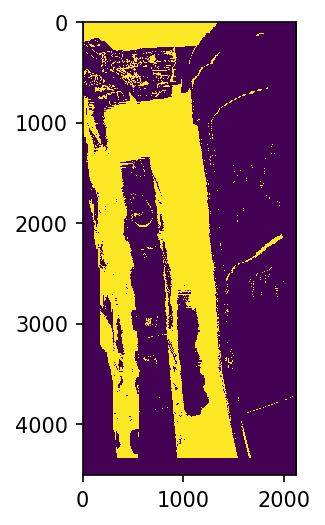

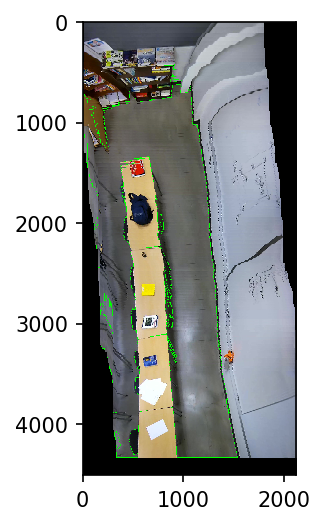

In [30]:
# find all the 'black' shapes in the image
lower = np.array([minred, mingre, minblu])
upper = np.array([maxred, maxgre, maxblu])
shapeMask = cv2.inRange(image, lower, upper)

# find the contours in the mask
cnts = cv2.findContours(shapeMask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
print("Found {} contours".format(len(cnts)))
#cv2.imshow("Mask", shapeMask)
plt.imshow(shapeMask); 
plt.show()

# loop over the contours
larea = 100
cimage = image.copy()
for c in cnts:
    # draw the contour and show it
    area = cv2.contourArea(c)
    if area > larea:
        larea = area
        cimage = image.copy()
        cv2.drawContours(cimage, [c], -1, (0, 255, 0), 2)
    
    #cv2.imshow("Image", image)
#     plt.imshow(image); 
#     plt.show()
#     cv2.waitKey(0)

plt.imshow(cv2.cvtColor(cimage, cv2.COLOR_BGR2RGB)); # print final contour drawing in loop
plt.show()

In [31]:
rarea = round(((larea * height * 0.0000025)*10.7639),3)
print("Floor is approx.",rarea,"feet squared.")
tarea = round(((image.shape[0] * image.shape[1] * height * 0.0000025)*10.7639),3)
print("Total area in image is approx.",tarea,"feet squared.")

Floor is approx. 159.885 feet squared.
Total area in image is approx. 516.521 feet squared.


In [32]:
#Write data to ftp dir
txtf = open("C:\\ftp\\room.txt","w+") 

txtf.write(str(rarea)+"\n"+str(tarea))
txtf.close()

cv2.imwrite("C:\\ftp\\room.png", cimage)

True